#Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)
sns.set(style="whitegrid")

#Loading the Dataset
df = pd.read_csv('customer churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replaying blanks with 0 as tenure is 0 and no total charges are recorded

In [3]:
# ================================================================
# 3. Data Cleaning
# ================================================================
# Handle TotalCharges (convert to float, replace blanks)
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Data Cleaning - isnull overall value define. here double sum count overall value is not 0

In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
# find we have dublicate data here but we don't have dublicate data

In [8]:
df["customerID"].duplicated().sum()

np.int64(0)

In [9]:
#Checked the info,checked the descriptive analytics,checked if there are null values or not, checked duplicate values, also checked the data types

In [10]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return"no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

In [11]:
#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [12]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


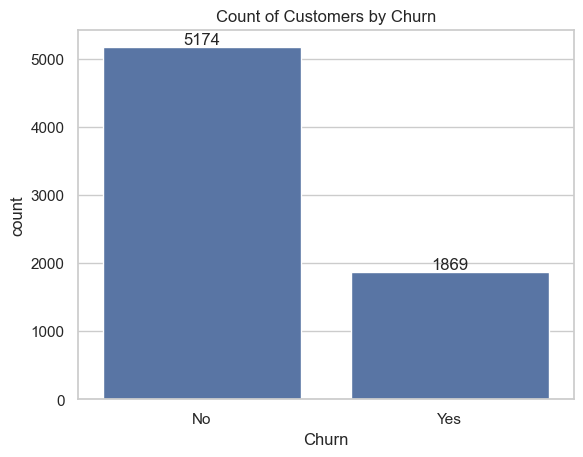

In [13]:
# ================================================================
# 4. Exploratory Data Analysis (EDA)
# ================================================================

# ---- 4.1 Target Variable: Churn ----
ax = sns.countplot(x ='Churn' , data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

In [14]:
# we have churn out customer 1869 also see in percentage value we use pie chart

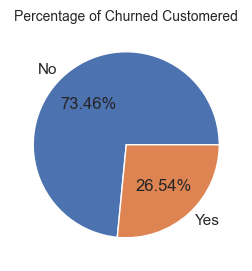

In [15]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn' : "count"})

plt.pie(gb['Churn'],labels= gb.index, autopct ="%1.2f%%")
plt.title("Percentage of Churned Customered" , fontsize = 10)
plt.show()

#from the given pie chart we can coclude that 26.54% of our customers have churned out (left). #not let's explore the reason behind it

Understanding Variables- Gender, SeniorCitizen, Partner, Dependents, InternetService, Contract, PaymentMethod, etc.


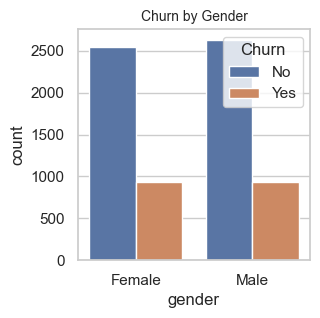

In [16]:
# ---- 4.2 Categorical Variables ----
plt.figure(figsize = (3,3))
sns.countplot(x= "gender", data = df, hue = "Churn")
plt.title("Churn by Gender" , fontsize = 10)
plt.show()

In [17]:
# churned out female and male are same

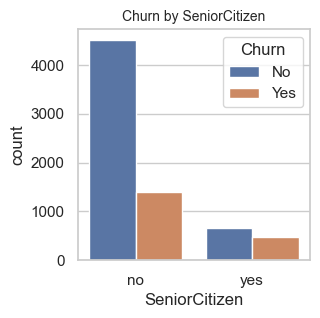

In [18]:
plt.figure(figsize = (3,3))
sns.countplot(x= "SeniorCitizen", data = df, hue = "Churn")
plt.title("Churn by SeniorCitizen" , fontsize = 10)
plt.show()

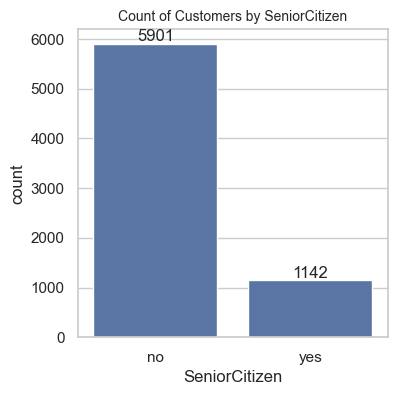

In [19]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x= "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by SeniorCitizen" , fontsize = 10)
plt.show()

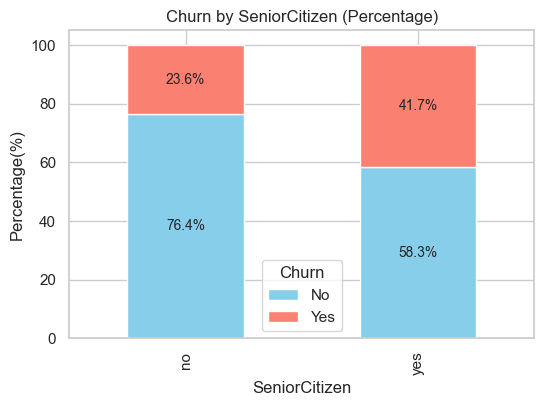

In [20]:
# Crosstab visualization for SeniorCitizen
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Convert counts to percentages
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ct_percent.plot(kind='bar', stacked=True, figsize=(6,4), color=['skyblue','salmon'])

# Add percentage labels on bars
for i, row in enumerate(ct_percent.values):
    bottom = 0
    for j, val in enumerate(row):
        plt.text(i, bottom + val/2, f'{val:.1f}%', ha='center', va='center', fontsize=10)
        bottom += val

plt.title("Churn by SeniorCitizen (Percentage)", fontsize=12)
plt.ylabel("Percentage(%)")
plt.xlabel("SeniorCitizen")
plt.legend(title='Churn')
plt.show()

#41% of the people have churn out

#comparative a greater percentage of people in senior citizen category have churned.

Numerical variables: Tenure, MonthlyCharges, TotalCharges.


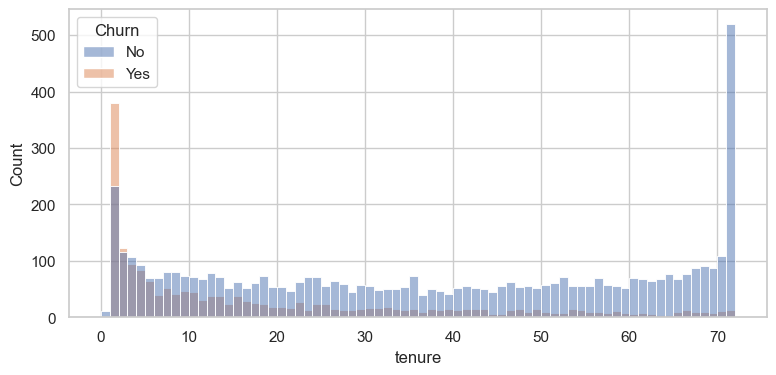

In [21]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

#people who started our services in the initial days, in the first month lots of people churn out our service

#people who have used our services for a long time have stayed and people who have used our services for one or two months have churned

#we also checked long time our service used people (reason behind a contract)

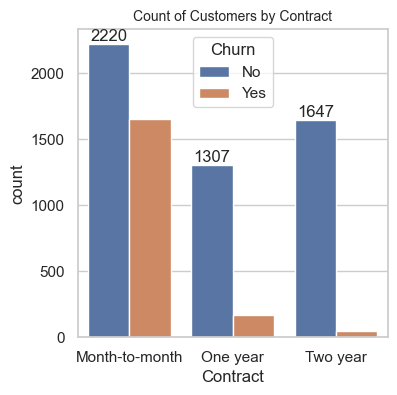

In [22]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x= "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract" , fontsize = 10)
plt.show()

#people who have month to month contract are likely to Churn then from those who have 1 or 2 years or contract

In [23]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

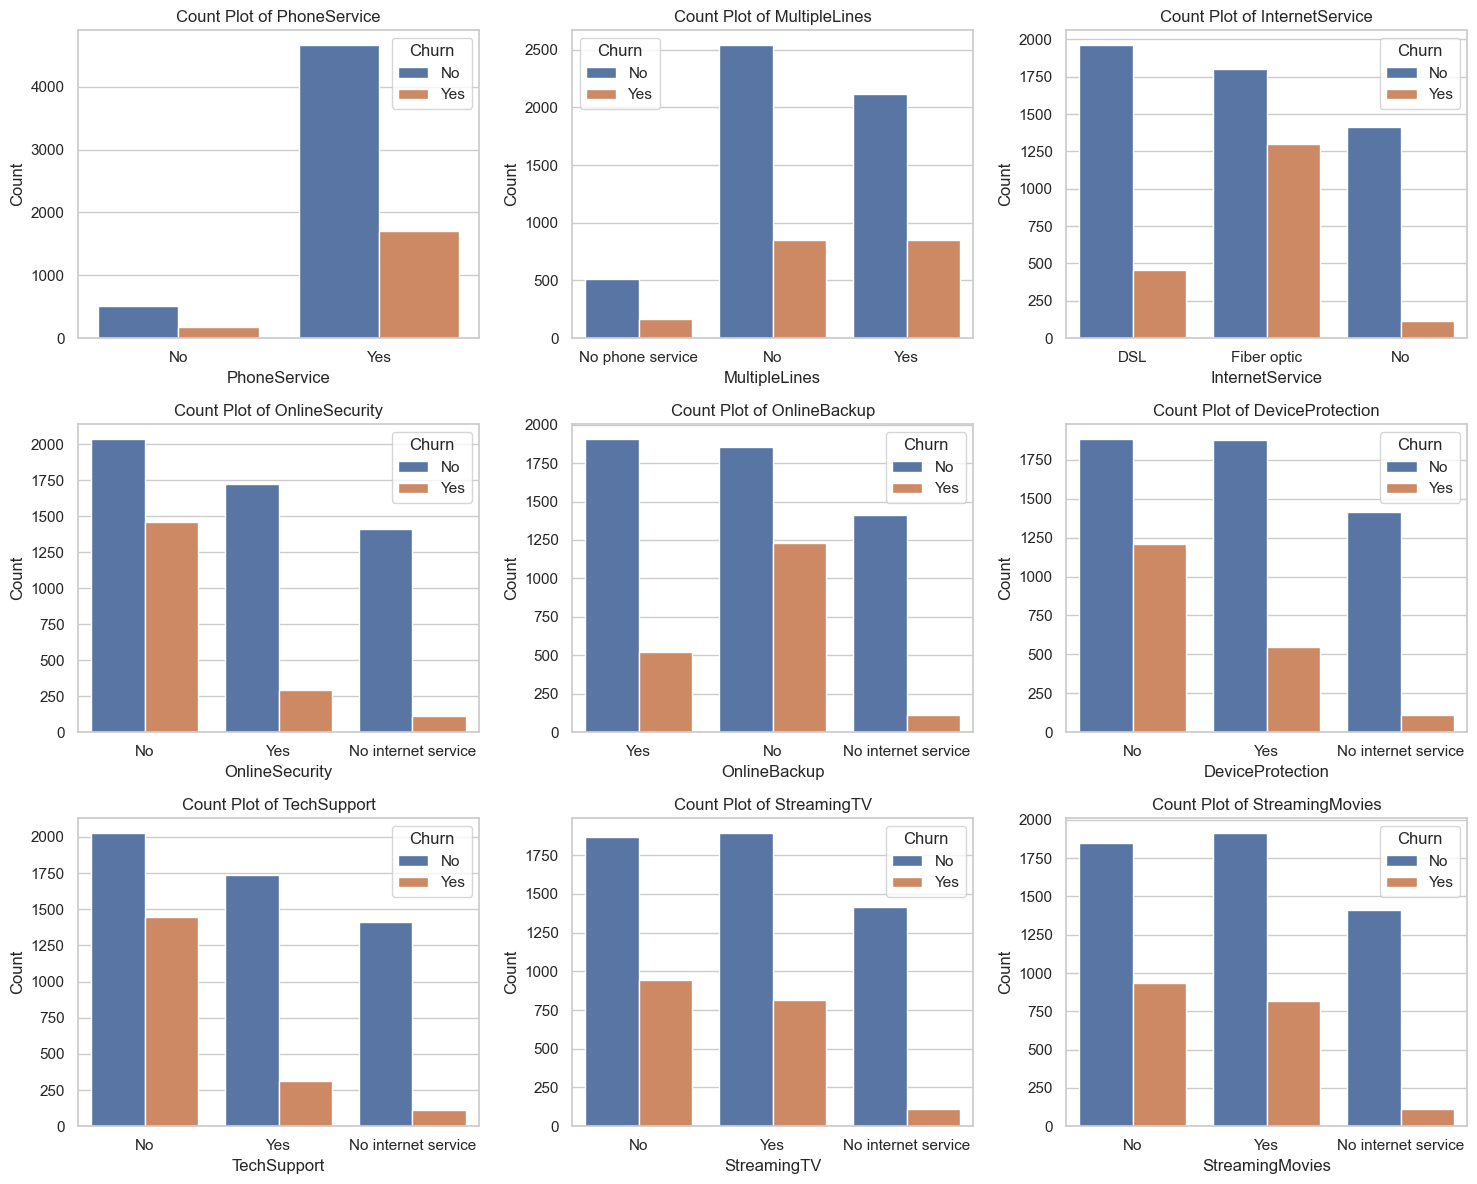

In [24]:
# ---- 4.4 Service-based Variables ----
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

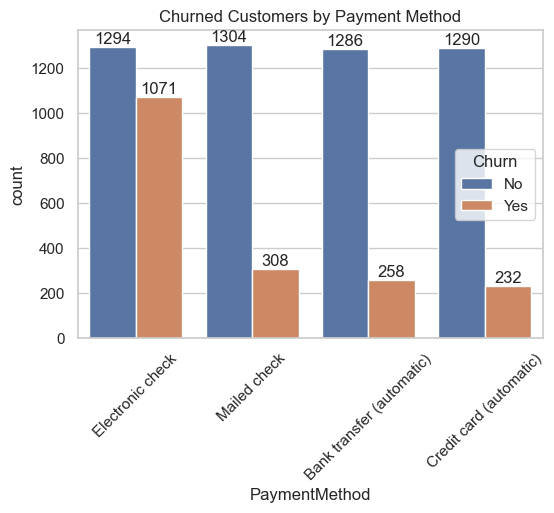

In [25]:
# Payment Method
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

#customer is likely to churn when he is using electronic check as a payment method.

#Analysis of Numeric Variables by Target

In [26]:
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    print(pd.DataFrame({numerical_col+'_mean': dataframe.groupby(target)[numerical_col].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=target, y=numerical_col, data=dataframe)
        plt.show(block=True)

In [27]:
# Identify numerical columns in df
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Check what we got
print("Numerical columns:", num_cols)

# Run your loop
for col in num_cols:
    target_summary_with_num(df, "Churn", col, plot=False)


Numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges']
       tenure_mean
Churn             
No       37.569965
Yes      17.979133


       MonthlyCharges_mean
Churn                     
No               61.265124
Yes              74.441332


       TotalCharges_mean
Churn                   
No           2549.911442
Yes          1531.796094




#Correlation Analysis

In [28]:
# ---- 4.5 Correlation Analysis ----
corr = df[num_cols].corr()

In [29]:
corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


In [30]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    # Only numerical columns
    numeric_df = dataframe.select_dtypes(include=[np.number])

    # Correlation matrix
    corr = numeric_df.corr()
    cor_matrix = corr.abs()

    # Select upper triangular matrix (to remove unnecessary repetitions)
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

    # Let's select the column pairs whose correlation is higher than the threshold
    high_corrs = [(col, row)
                  for col in cor_matrix.columns
                  for row in cor_matrix.index
                  if not pd.isna(upper_triangle_matrix.loc[row, col]) and abs(
            upper_triangle_matrix.loc[row, col]) > corr_th]

    if plot:
        # Heatmap
        plt.figure(figsize=(10, 6))
        sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu")
        plt.title("Correlation Heat Map")
        plt.show()

    return high_corrs
 

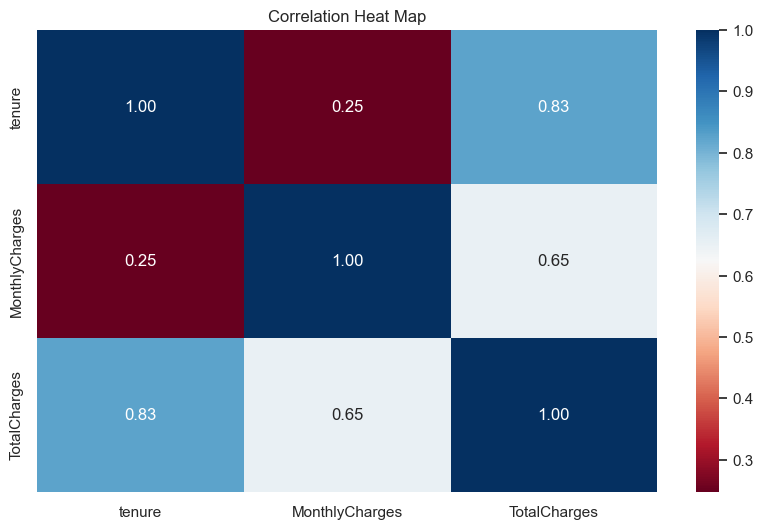

[('TotalCharges', 'tenure')]

In [31]:
high_correlated_cols(df, plot=True)

Tenure ↔ Total Charges (0.83 correlation): Customers who stay longer naturally spend more overall, so total charges increase with tenure.

Monthly Charges ↔ Total Charges (0.65 correlation): Customers who pay more each month also end up with higher total charges.

Tenure ↔ Monthly Charges (0.25 correlation): How long a customer has stayed doesn’t really affect how much they pay monthly.

In [32]:
import sqlite3
conn = sqlite3.connect(':memory:')
df.to_sql('churn', conn, index=False)

pd.read_sql("SELECT Contract, COUNT(*) AS n_customers, AVG(Churn) AS churn_rate FROM churn GROUP BY Contract", conn)


,Contract,n_customers,churn_rate
0,Month-to-month,3875,0.0
1,One year,1473,0.0
2,Two year,1695,0.0


SQL Analysis


In [33]:
# --- Step 1. Make sure Churn is numeric before using SQL ---
df_sql = df.copy()
df_sql['Churn'] = df_sql['Churn'].map({'No': 0, 'Yes': 1})

# reload into sqlite (overwrite if exists)
df_sql.to_sql('churn', conn, index=False, if_exists='replace')

# --- Step 2. Queries ---

# Churn by Contract Type
query_contract = """
SELECT Contract, COUNT(*) AS n_customers, ROUND(AVG(Churn),3) AS churn_rate
FROM churn
GROUP BY Contract
ORDER BY churn_rate DESC
"""
df_contract = pd.read_sql(query_contract, conn)
display(df_contract)

# Churn by Payment Method
query_payment = """
SELECT PaymentMethod, COUNT(*) AS n_customers, ROUND(AVG(Churn),3) AS churn_rate
FROM churn
GROUP BY PaymentMethod
ORDER BY churn_rate DESC
"""
df_payment = pd.read_sql(query_payment, conn)
display(df_payment)

# Churn by Internet Service
query_internet = """
SELECT InternetService, COUNT(*) AS n_customers, ROUND(AVG(Churn),3) AS churn_rate
FROM churn
GROUP BY InternetService
ORDER BY churn_rate DESC
"""
df_internet = pd.read_sql(query_internet, conn)
display(df_internet)

# Churn by Tenure Groups
query_tenure = """
SELECT 
  CASE 
    WHEN tenure < 12 THEN '0-1 year'
    WHEN tenure < 24 THEN '1-2 years'
    WHEN tenure < 60 THEN '2-5 years'
    ELSE '5+ years' END AS tenure_group,
  COUNT(*) AS n_customers,
  ROUND(AVG(Churn),3) AS churn_rate
FROM churn
GROUP BY tenure_group
ORDER BY churn_rate DESC
"""
df_tenure = pd.read_sql(query_tenure, conn)
display(df_tenure)


,Contract,n_customers,churn_rate
0,Month-to-month,3875,0.427
1,One year,1473,0.113
2,Two year,1695,0.028


,PaymentMethod,n_customers,churn_rate
0,Electronic check,2365,0.453
1,Mailed check,1612,0.191
2,Bank transfer (automatic),1544,0.167
3,Credit card (automatic),1522,0.152


,InternetService,n_customers,churn_rate
0,Fiber optic,3096,0.419
1,DSL,2421,0.190
2,No,1526,0.074


,tenure_group,n_customers,churn_rate
0,0-1 year,2069,0.483
1,1-2 years,1047,0.295
2,2-5 years,2444,0.189
3,5+ years,1483,0.067


Contracts: People with month-to-month contracts leave the most. Those with 1-year contracts leave less, and 2-year contract customers almost never leave.

Payments: Customers paying with electronic checks leave the most. People who pay automatically with a credit card or bank transfer are more likely to stay.

Internet Service: Customers using fiber optic internet leave more often. DSL users leave less, and those without internet service rarely leave.

Tenure (time as a customer): New customers (less than 1 year) leave the most. The longer someone stays, the less likely they are to cancel.

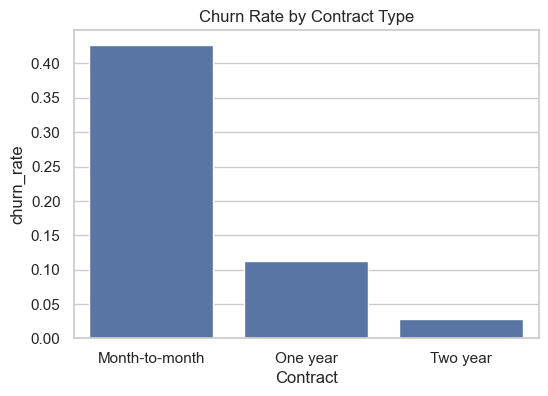

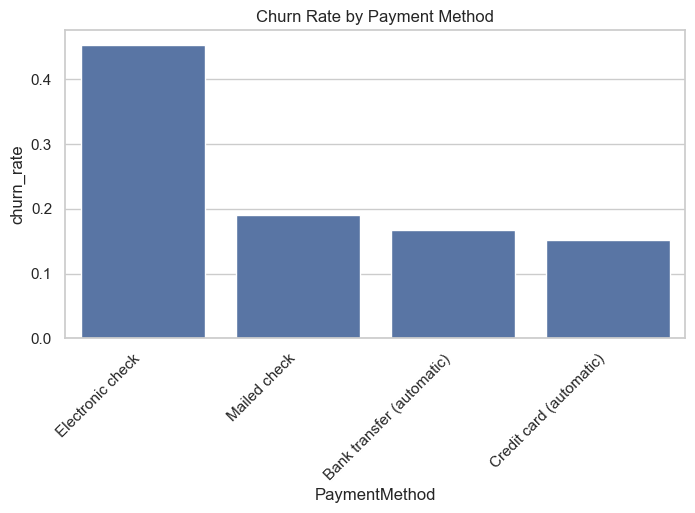

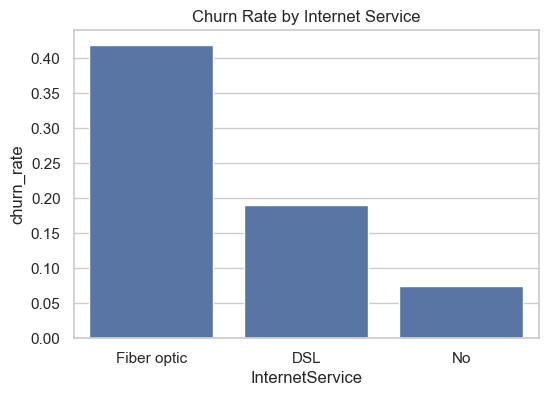

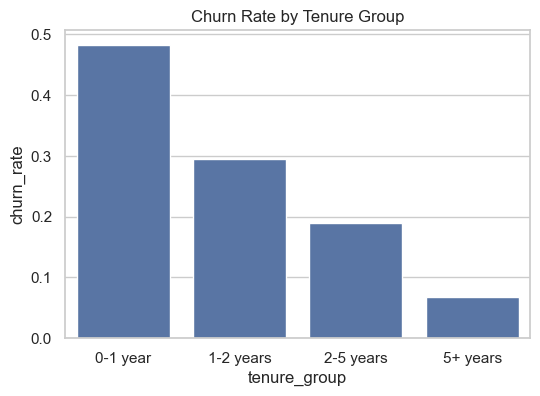

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot churn by contract
plt.figure(figsize=(6,4))
sns.barplot(data=df_contract, x='Contract', y='churn_rate')
plt.title('Churn Rate by Contract Type')
plt.show()

# Plot churn by payment method
plt.figure(figsize=(8,4))
sns.barplot(data=df_payment, x='PaymentMethod', y='churn_rate')
plt.xticks(rotation=45, ha='right')
plt.title('Churn Rate by Payment Method')
plt.show()

# Plot churn by internet service
plt.figure(figsize=(6,4))
sns.barplot(data=df_internet, x='InternetService', y='churn_rate')
plt.title('Churn Rate by Internet Service')
plt.show()

# Plot churn by tenure groups
plt.figure(figsize=(6,4))
sns.barplot(data=df_tenure, x='tenure_group', y='churn_rate')
plt.title('Churn Rate by Tenure Group')
plt.show()


In [35]:
import plotly.express as px

# Churn distribution
fig = px.histogram(df, x='Contract', color='Churn', barmode='group',
                   title="Churn by Contract Type")
fig.show()

# Scatter MonthlyCharges vs Tenure
fig = px.scatter(df, x='tenure', y='MonthlyCharges', color='Churn',
                 title="Monthly Charges vs Tenure by Churn")
fig.show()


In [36]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

# Create the app
app = Dash(__name__)

# Layout with dropdown + graph
app.layout = html.Div([
    html.H1("Customer Churn Dashboard"),

    dcc.Dropdown(
        id='feature-dropdown',
        options=[{'label': c, 'value': c} for c in ['Contract', 'PaymentMethod', 'InternetService']],
        value='Contract'
    ),

    dcc.Graph(id='churn-graph')
])

# Callback
@app.callback(
    Output('churn-graph', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_graph(selected_feature):
    fig = px.histogram(df, x=selected_feature, color='Churn', barmode='group')
    return fig

# ✅ Run app in Jupyter
app.run(mode="inline", port=8051)






Dropdown to select feature (Contract, PaymentMethod, InternetService)
Dynamic churn graphs update instantly
Helps business users explore churn visually


Dataset: Customer Churn.csv (Kaggle – Telco Customer Churn)
Scope: 7,043 rows, 21 columns
Target variable: Churn (Yes/No)
Core variables: gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges

The goal is to study customer churn (when customers leave) in a telecom company. We want to find out what factors make customers more likely to cancel.

Early results show:

- About 26.5% of customers leave.

- Older people and those with short contracts leave more often.

- Customers with month-to-month contracts have a higher chance of leaving.

- Customers who don’t use extra services (like online backup, tech support, or streaming TV) are more likely to cancel.

- Customers who pay with electronic checks are also more likely to leave.

The project will include both data analysis and charts/visuals to show the links between customer details, contract type, services, and churn.

1) Data preparation
- Importing the CSV file
- Handling missing or incorrect values (cleaning TotalCharges)
- Type conversion and transformation of variables (e.g. SeniorCitizen to Yes/No)
2) Descriptive analysis
- Overview of data structure and distribution of variables
- Calculation of basic statistics (describe())
- Visualisation of churn rate with bar and pie charts
3) Analysis by customer group
- Churn by gender, SeniorCitizen, partner status, contract term
- Histograms: tenure vs. churn
- Stacked bar charts: SeniorCitizen vs. churn
4) Analysis of services
- Comparison of service usage (PhoneService, InternetService, OnlineSecurity, etc.)
- Visualisation via subplots for all relevant service columns
5) Analysis of payment methods
- Visualisation of churn by payment method
- Identification of payment methods with increased churn risk
6) Summary & conclusions
- Identification of main factors influencing churn
- Derivation of recommendations for improving customer loyalty